## Previsão de inadimplência de clientes
### projeto ciência de dados

### Objetivo:

- desenvolver um modelo de classificação de Machine Learning capaz de prever a inadimplência de clientes em operações de crédito, 

apoiando a tomada de decisão, reduzindo riscos financeiros e gerando insights estratégicos para concessão de crédito.

### Tecnologias usadas:

- Python

- Pandas

- NumPy

- Scikit-learn

- Matplotlib / Seaborn

- Scikit-linear_model

- Scikit.model_selection

- sklearn.impute

- sklearn.preprocessing

- sklearn.metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

## base de dados

algumas colunas mais relevantes do dataset:

AMT_INCOME_TOTAL -	**renda do cliente**

AMT_CREDIT	- **valor do crédito**

AMT_ANNUITY	- **valor da parcela**

DAYS_EMPLOYED	- **tempo de emprego**

DAYS_BIRTH	- **idade**

EXT_SOURCE_1/2/3	- **score externo de crédito**

TARGET ***(variável-alvo)*** - 0 para cliente que pagou (adimplente) e 1 para cliente que não pagou (inadimplente)

In [2]:
base = pd.read_csv(r"E:\MAYLSON - CIENCIAS DE DADOS\Ciencia de Dados\Projetos_GPT\Previsão de inadimplência de clientes\base de dados\application_train.csv")

base.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Entendimento inicial da base

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


a base de dados possui 307.511 linhas e 122 colunas, sendo:

106 variáveis numéricas e 16 categóricas

## Seleção/redução das variáveis

In [4]:
cols_relevantes = [
    "TARGET",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "DAYS_EMPLOYED",
    "DAYS_BIRTH",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3"
]

df_compacto = base[cols_relevantes].copy()

df_compacto

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,202500.0,406597.5,24700.5,-637,-9461,0.083037,0.262949,0.139376
1,0,270000.0,1293502.5,35698.5,-1188,-16765,0.311267,0.622246,NaN
2,0,67500.0,135000.0,6750.0,-225,-19046,NaN,0.555912,0.729567
3,0,135000.0,312682.5,29686.5,-3039,-19005,NaN,0.650442,NaN
4,0,121500.0,513000.0,21865.5,-3038,-19932,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,-236,-9327,0.145570,0.681632,NaN
307507,0,72000.0,269550.0,12001.5,365243,-20775,NaN,0.115992,NaN
307508,0,153000.0,677664.0,29979.0,-7921,-14966,0.744026,0.535722,0.218859
307509,1,171000.0,370107.0,20205.0,-4786,-11961,NaN,0.514163,0.661024


## Análise estatística descritiva

In [5]:
df_compacto.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000
mean,0.080729,1.687979e+05,5.990260e+05,27108.573909,63815.045904,-16036.995067,0.502130,5.143927e-01,0.510853
std,0.272419,2.371231e+05,4.024908e+05,14493.737315,141275.766519,4363.988632,0.211062,1.910602e-01,0.194844
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,-17912.000000,-25229.000000,0.014568,8.173617e-08,0.000527
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,-2760.000000,-19682.000000,0.334007,3.924574e-01,0.370650
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,-1213.000000,-15750.000000,0.505998,5.659614e-01,0.535276
75%,0.000000,2.025000e+05,8.086500e+05,34596.000000,-289.000000,-12413.000000,0.675053,6.636171e-01,0.669057
max,1.000000,1.170000e+08,4.050000e+06,258025.500000,365243.000000,-7489.000000,0.962693,8.549997e-01,0.896010


## Análise da variável-alvo **(Target)**

In [6]:
base['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

base com 92% dos clientes adimplentes

8% inadimplentes, demonstra classes desbalanceadas.

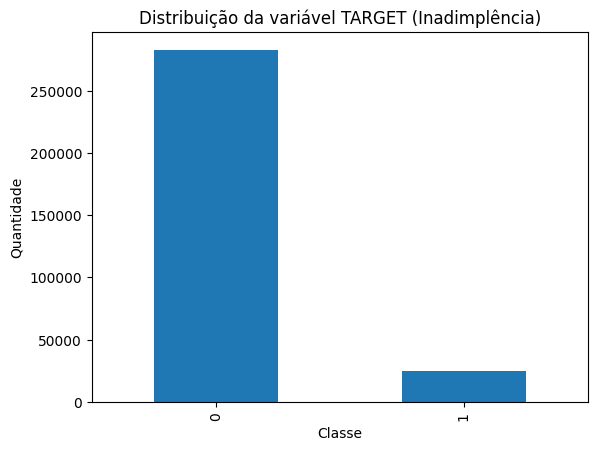

In [7]:
base["TARGET"].value_counts().plot(kind="bar")
plt.title("Distribuição da variável TARGET (Inadimplência)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

## Tratamento de dados (pré-processamento)

Nesta etapa, foi realizada a preparação dos dados visando:

Garantir consistência

Tratar valores ausentes

Preservar o máximo de informação relevante

Evitar perda de poder preditivo

In [8]:
df_compacto.isnull().mean().sort_values(ascending=False)

EXT_SOURCE_1        0.563811
EXT_SOURCE_3        0.198253
EXT_SOURCE_2        0.002146
AMT_ANNUITY         0.000039
TARGET              0.000000
DAYS_EMPLOYED       0.000000
AMT_CREDIT          0.000000
AMT_INCOME_TOTAL    0.000000
DAYS_BIRTH          0.000000
dtype: float64

Principais variáveis com missing:

-EXT_SOURCE_1:	**56%**

-EXT_SOURCE_3:	**19%**

-EXT_SOURCE_2:	**0.2%**

Variáveis com alto missing ***(EXT_SOURCE_1 e EXT_SOURCE_3)***, será criada uma variável indicadora (flag_missing) + Imputação com mediana, pois pode haver valor informativo na ausência e mediana é robusta a outliers.

Variáveis com baixo missing ***(EXT_SOURCE_2 e AMT_ANNUITY)*** será imputada direta com mediana.

In [9]:
# Garantir cópia real
df_compacto = df_compacto.copy()

# Flags de missing
df_compacto.loc[:, 'EXT_SOURCE_1_MISSING'] = df_compacto['EXT_SOURCE_1'].isnull().astype(int)
df_compacto.loc[:, 'EXT_SOURCE_3_MISSING'] = df_compacto['EXT_SOURCE_3'].isnull().astype(int)

# Imputação com mediana (forma segura)
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_ANNUITY']:
    mediana = df_compacto[col].median()
    df_compacto[col] = df_compacto[col].fillna(mediana)

### Validação pós-tratamento

In [10]:
df_compacto.isnull().sum()

TARGET                  0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY             0
DAYS_EMPLOYED           0
DAYS_BIRTH              0
EXT_SOURCE_1            0
EXT_SOURCE_2            0
EXT_SOURCE_3            0
EXT_SOURCE_1_MISSING    0
EXT_SOURCE_3_MISSING    0
dtype: int64

base sem valores faltantes e flags criadas.

## Análise exploratória dos dados (análise bivariada)

### Relação entre renda x inadimplência

a renda do cliente influencia o risco de inadimplência?

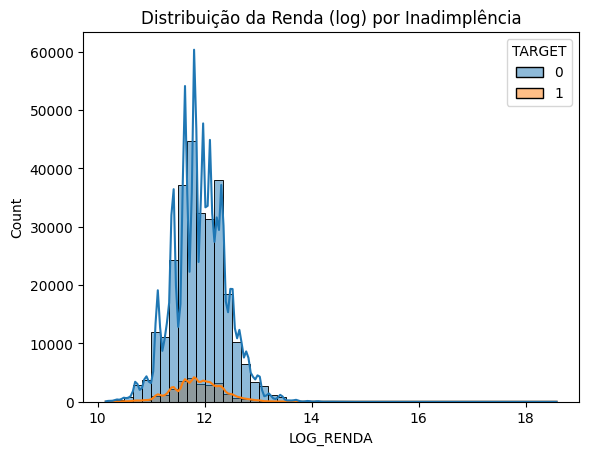

In [11]:
# entendendo a distribuição da renda dos indivíduos através do histograma
df_compacto['LOG_RENDA'] = np.log1p(df_compacto['AMT_INCOME_TOTAL'])

sns.histplot(data=df_compacto, x='LOG_RENDA', hue='TARGET', bins=50,  kde=True)
plt.title('Distribuição da Renda (log) por Inadimplência')
plt.show()

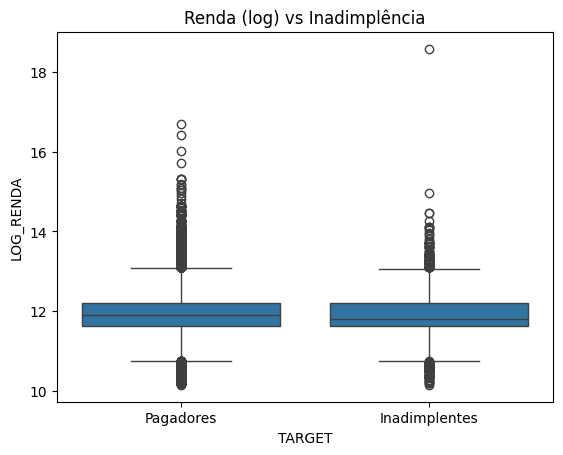

In [12]:
df_compacto['LOG_RENDA'] = np.log1p(df_compacto['AMT_INCOME_TOTAL'])

sns.boxplot(data=df_compacto, x='TARGET', y='LOG_RENDA')
plt.title('Renda (log) vs Inadimplência')
plt.xticks([0,1], ["Pagadores", "Inadimplentes"])
plt.show()

A análise da renda revelou alta dispersão e presença de outliers extremos.

Ao aplicar transformação logarítmica, observou-se que clientes inadimplentes apresentam, em média, renda ligeiramente inferior.

No entanto, há grande sobreposição entre os grupos, indicando que a renda isoladamente não é suficiente para discriminar o risco de crédito.

### Agrupamento da renda média por grupo

In [13]:
df_compacto.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()

TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64

A análise da renda demonstrou que, isoladamente, a variável não apresenta forte poder discriminatório entre adimplentes e inadimplentes.

Apesar de uma leve tendência de menor renda entre inadimplentes, a diferença média é pequena.

Isso indica que a renda deve ser combinada com outras variáveis para melhor predição do risco de crédito.

### Valor do crédito x inadimplência

inadimplentes possuem crédito menor?

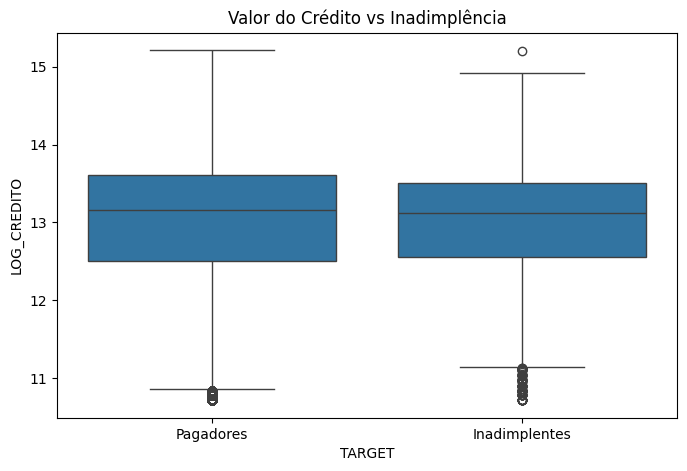

In [14]:
df_compacto['LOG_CREDITO'] = np.log1p(df_compacto['AMT_CREDIT'])

plt.figure(figsize=(8,5))
sns.boxplot(data=df_compacto, x='TARGET', y='LOG_CREDITO')
plt.xticks([0,1], ["Pagadores", "Inadimplentes"])
plt.title('Valor do Crédito vs Inadimplência')
plt.show()

### Agrupamento do valor médio de crédito por grupos

In [15]:
df_compacto.groupby('TARGET')['AMT_CREDIT'].mean()

TARGET
0    602648.282002
1    557778.527674
Name: AMT_CREDIT, dtype: float64

O valor do crédito apresenta uma leve tendência de ser menor entre clientes inadimplentes. 

No entanto, a diferença entre os grupos é pequena e há grande sobreposição nas distribuições. 

Isso indica que o valor do crédito, isoladamente, também não possui forte poder discriminatório para prever inadimplência.

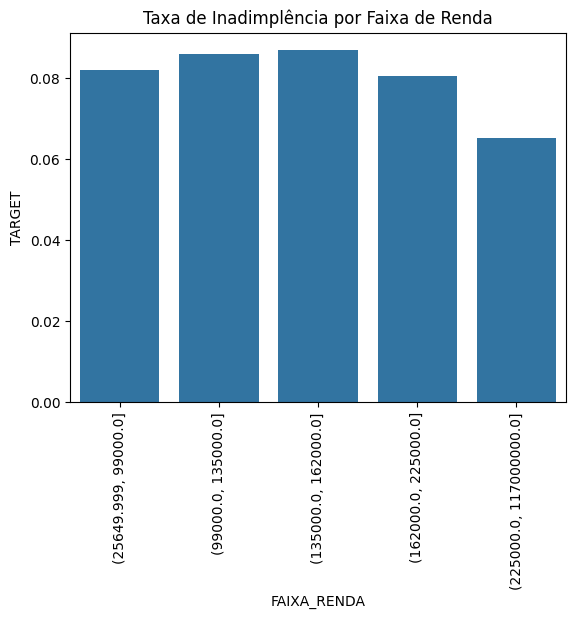

In [16]:
# mesmo número de pessoas em cada grupo, mantendo equilibrio entre os grupos
df_compacto["FAIXA_RENDA"] = pd.qcut(df_compacto["AMT_INCOME_TOTAL"], q=5)

# agrupamento por faixa de renda
taxa_inad = df_compacto.groupby("FAIXA_RENDA", observed=False)["TARGET"].mean().reset_index()

sns.barplot(data=taxa_inad, x='FAIXA_RENDA', y='TARGET')
plt.title('Taxa de Inadimplência por Faixa de Renda')
plt.xticks(rotation=90)
plt.show()

A análise por faixas de renda indicou uma leve relação entre renda e inadimplência, com redução do risco nas faixas de maior renda.

No entanto, a diferença entre os grupos é pequena e observa-se um comportamento atípico na faixa intermediária, que apresentou maior taxa de inadimplência.

Esse padrão pode indicar maior exposição ao crédito em perfis de renda média, sugerindo que a renda isoladamente não é suficiente para discriminar o risco.

### Idade x Inadimplência

indivíduos mais jovens têm mais inadimplência?

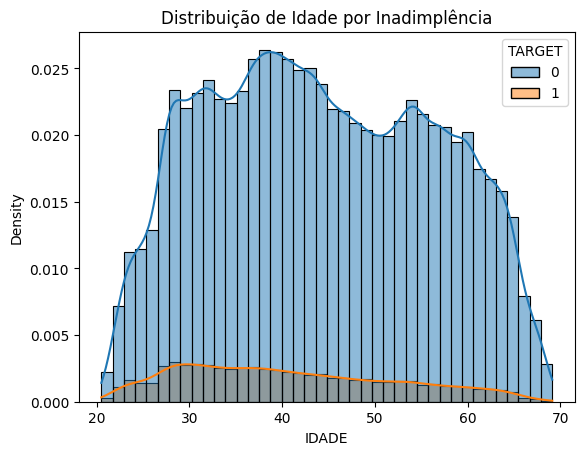

In [17]:
df_compacto["IDADE"] = df_compacto["DAYS_BIRTH"] / -365

sns.histplot(data=df_compacto, x='IDADE', hue='TARGET', bins=40, stat='density', kde=True)
plt.title('Distribuição de Idade por Inadimplência')
plt.show()

A análise de idade revelou um padrão claro de risco de inadimplência.

Clientes mais jovens, especialmente na faixa próxima aos 30 anos, apresentam maior probabilidade de inadimplência.

Observa-se uma redução consistente do risco com o aumento da idade, indicando maior estabilidade financeira em clientes mais maduros.

Esse padrão sugere que a idade é uma variável relevante para modelos de risco de crédito.

### Score externo

inadimplentes têm scores menores?

In [18]:
df_compacto.groupby("TARGET")["EXT_SOURCE_1"].mean()

TARGET
0    0.508396
1    0.457791
Name: EXT_SOURCE_1, dtype: float64

In [19]:
df_compacto.groupby("TARGET")["EXT_SOURCE_2"].mean()

TARGET
0    0.52357
1    0.41126
Name: EXT_SOURCE_2, dtype: float64

In [20]:
df_compacto.groupby("TARGET")["EXT_SOURCE_3"].mean()

TARGET
0    0.523767
1    0.423775
Name: EXT_SOURCE_3, dtype: float64

<Axes: xlabel='TARGET', ylabel='EXT_SOURCE_2'>

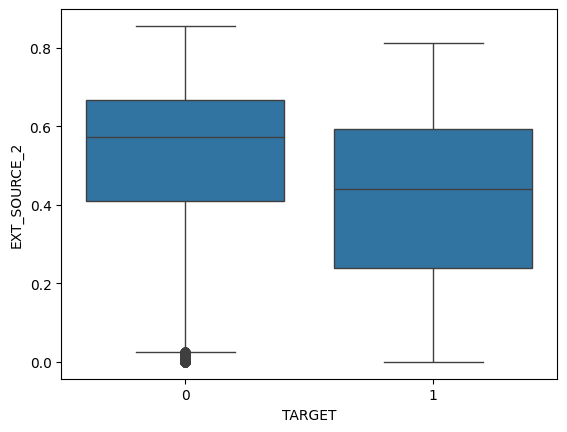

In [21]:
sns.boxplot(data=df_compacto, x='TARGET', y='EXT_SOURCE_2')

Observa-se que as variáveis EXT_SOURCE apresentam clara correlação com inadimplência, com clientes inadimplentes apresentando scores consistentemente menores. 

No entanto, as distribuições apresentam sobreposição significativa, indicando que o risco de crédito não pode ser explicado por uma única variável, sendo necessária a combinação de múltiplos fatores para uma predição robusta.”

## feature engineering

### média de score externo por grupos

In [22]:
# Criando a média dos scores externos
df_compacto['EXT_SOURCE_MEAN'] = df_compacto[
    ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
].mean(axis=1)

# Verificando estatísticas básicas
df_compacto['EXT_SOURCE_MEAN'].describe()

count    307511.000000
mean          0.511503
std           0.108104
min           0.023705
25%           0.441604
50%           0.521564
75%           0.587715
max           0.853417
Name: EXT_SOURCE_MEAN, dtype: float64

In [23]:
# Média da feature por classe
media_por_target = df_compacto.groupby('TARGET')['EXT_SOURCE_MEAN'].mean()
print(media_por_target)

TARGET
0    0.518578
1    0.430942
Name: EXT_SOURCE_MEAN, dtype: float64


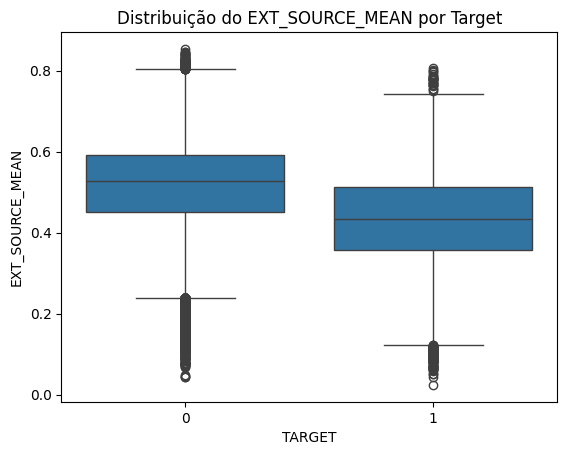

In [24]:
# Boxplot comparando as classes
sns.boxplot(data=df_compacto, x='TARGET', y='EXT_SOURCE_MEAN')
plt.title('Distribuição do EXT_SOURCE_MEAN por Target')
plt.show()

feature válida, com dispersão saudável e sem valores absurdos

inadimplentes têm score externo bem menor em média

existe tendência consistente de separação

### relação parcela x renda 

inadimplentes comprometem mais renda com parcela?

In [25]:
df_compacto['ANNUITY_INCOME_RATIO'] = df_compacto['AMT_ANNUITY'] / df_compacto['AMT_INCOME_TOTAL']

df_compacto['ANNUITY_INCOME_RATIO'].describe()

count    307511.000000
mean          0.180929
std           0.094573
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: ANNUITY_INCOME_RATIO, dtype: float64

#### comprometimento médio da parcela na renda do grupo

In [26]:
df_compacto.groupby("TARGET")["ANNUITY_INCOME_RATIO"].mean()

TARGET
0    0.180529
1    0.185482
Name: ANNUITY_INCOME_RATIO, dtype: float64

diferença média pequena de 0.005

isoladamente, essa variável não discrimina bem quem vai inadimplir

#### boxplot: parcela x renda

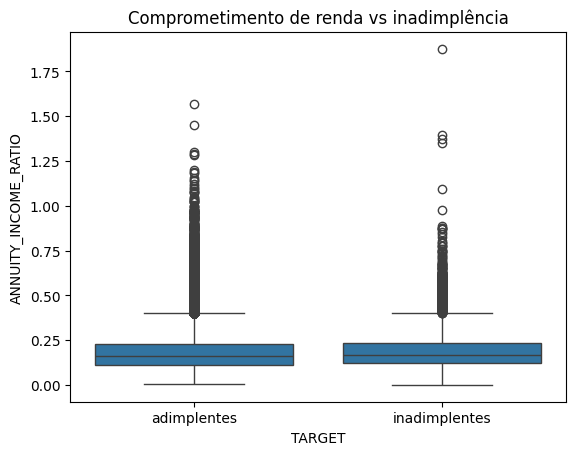

In [27]:
sns.boxplot(data=df_compacto, x="TARGET", y="ANNUITY_INCOME_RATIO")
plt.title("Comprometimento de renda vs inadimplência")
plt.xticks([0, 1], ['adimplentes', 'inadimplentes'])
plt.show()

embora a variável tenha mostrado fraco poder de separação, pois os bloxpots estão sobrepostos e com muitos outliers,

ela pode ajudar em combinação com outras variáveis, portanto é recomendável deixar o modelo decidir a importância dela.

### Relação valor do crédito x renda

inadimplentes têm mais dívida em relação à renda?

In [28]:
df_compacto['CREDIT_INCOME_RATIO'] = df_compacto['AMT_CREDIT'] / df_compacto['AMT_INCOME_TOTAL']

df_compacto['CREDIT_INCOME_RATIO'].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: CREDIT_INCOME_RATIO, dtype: float64

In [29]:
df_compacto.groupby("TARGET")["CREDIT_INCOME_RATIO"].mean()

TARGET
0    3.963729
1    3.887438
Name: CREDIT_INCOME_RATIO, dtype: float64

adimplentes com maior relação crédito/renda do que inadimplentes, é contraintuitivo mas pode sim acontecer por alguns motivos reais de negócio, 

seja por que clientes com renda maior conseguem pegar crédito maior, ou por que clientes de maior renda têm capacidade de pagamento melhor, mesmo com dívida maior.

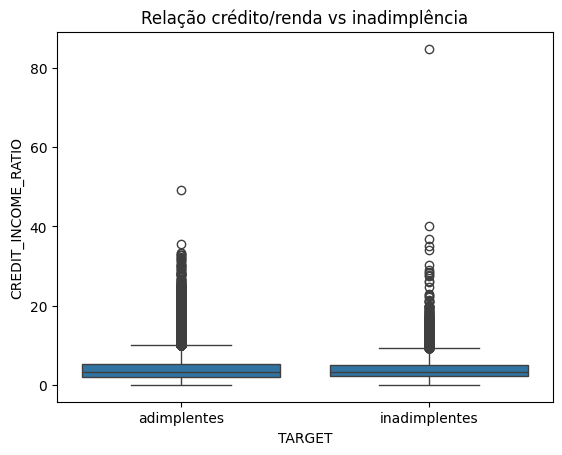

In [30]:
sns.boxplot(data=df_compacto, x="TARGET", y="CREDIT_INCOME_RATIO")
plt.title("Relação crédito/renda vs inadimplência")
plt.xticks([0, 1], ['adimplentes', 'inadimplentes'])
plt.show()

variável fraca isoladamente, diferença pequena entre grupos, com muita sobreposição e presença de outliers extremos

podendo, porém, ganhar relevância em interação com outras features.

### Análise da variável versão transformação logarítmica

reduz impacto de valores extremos (outliers) e testa diferentes representações da variável

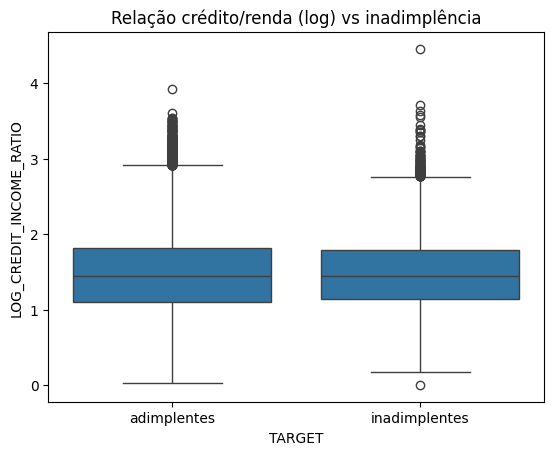

In [31]:
df_compacto["LOG_CREDIT_INCOME_RATIO"] = np.log1p(df_compacto["CREDIT_INCOME_RATIO"])

sns.boxplot(data=df_compacto, x="TARGET", y="LOG_CREDIT_INCOME_RATIO")
plt.title("Relação crédito/renda (log) vs inadimplência")
plt.xticks([0, 1], ['adimplentes', 'inadimplentes'])
plt.show()

pessoas mais jovens tendem a maior risco?

In [32]:
df_compacto['IDADE_ANOS'] = abs(df_compacto['DAYS_BIRTH']) / 365 # inverte o sinal para positivo

df_compacto.groupby("TARGET")["IDADE_ANOS"].mean()

TARGET
0    44.214182
1    40.780351
Name: IDADE_ANOS, dtype: float64

### Idade vs Inadimplência

inadimplentes são em média mais jovens?

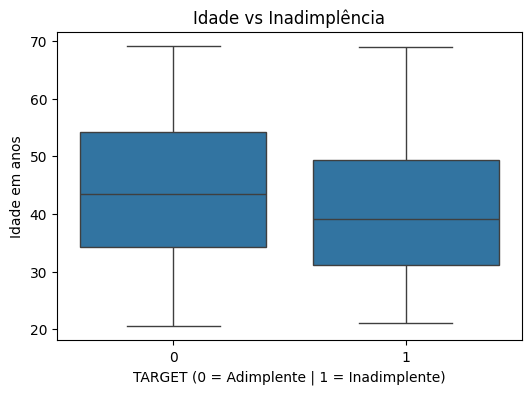

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data= df_compacto, x= 'TARGET', y='IDADE_ANOS'
)
plt.title("Idade vs Inadimplência")
plt.xlabel("TARGET (0 = Adimplente | 1 = Inadimplente)")
plt.ylabel("Idade em anos")
plt.show()

A variável idade apresentou relação consistente com inadimplência, com clientes inadimplentes sendo mais jovens em média. 

Apesar de haver sobreposição entre as distribuições, a feature apresenta bom sinal preditivo e foi mantida no modelo.

### Tempo de emprego x inadimplência

In [34]:
df_compacto["TEMPO_EMPREGADO_ANOS"] = df_compacto["DAYS_EMPLOYED"].abs() / 365

#### Tratamento de valor anômalo: 365243 dias de trabalho

In [35]:
df_compacto["TEMPO_EMPREGADO_ANOS"] = df_compacto["TEMPO_EMPREGADO_ANOS"].replace(365243/365, np.nan)

#### análise estatística descritiva da variável

In [36]:
df_compacto["TEMPO_EMPREGADO_ANOS"].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: TEMPO_EMPREGADO_ANOS, dtype: float64

média razoável sem valores absurdos

In [37]:
df_compacto.groupby("TARGET")["TEMPO_EMPREGADO_ANOS"].mean()

TARGET
0    6.679836
1    4.972380
Name: TEMPO_EMPREGADO_ANOS, dtype: float64

inadimplentes possuem menos anos empregados que os adimplentes, sugerindo que quanto maior o tempo de emprego, menos risco de inadimplência.

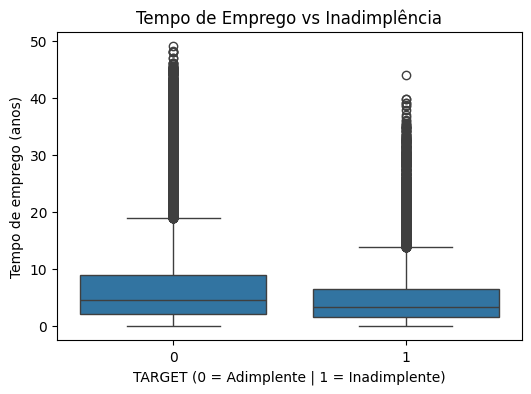

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_compacto, x="TARGET", y="TEMPO_EMPREGADO_ANOS")
plt.title("Tempo de Emprego vs Inadimplência")
plt.xlabel("TARGET (0 = Adimplente | 1 = Inadimplente)")
plt.ylabel("Tempo de emprego (anos)")
plt.show()

O tempo de emprego apresentou relação consistente com inadimplência, com clientes adimplentes apresentando maior estabilidade laboral em média. Apesar de haver sobreposição entre os grupos, a variável apresenta sinal preditivo relevante e foi mantida no modelo.

## Pré-modelagem (preparação final)

In [39]:
# flag de "sem histórico de trabalho"
df_compacto["EMPLOYED_MISSING"] = (df_compacto["DAYS_EMPLOYED"] == 365243).astype(int)

# substituir código inválido por NaN
df_compacto["DAYS_EMPLOYED"] = df_compacto["DAYS_EMPLOYED"].replace(365243, np.nan)

# criar variável em anos
df_compacto["YEARS_EMPLOYED"] = df_compacto["DAYS_EMPLOYED"].abs() / 365


#### Separar base X e y

In [40]:
X = df_compacto.drop(columns=["TARGET", "FAIXA_RENDA", "DAYS_EMPLOYED"]) # removendo variável alvo, variável 'faixa renda' pois não é numérica, é do tipo interval e a variável 'days_employed' pois criamos uma outra variável 'years_employed'
y = df_compacto["TARGET"]

# garantindo só colunas numéricas
X = X.select_dtypes(include=["int64", "float64"])

#### Divisão da base em treino e teste

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#### Divisão da base de treino em treino e validação

In [42]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [43]:
print("Treino_sub:", X_train_sub.shape)
print("Validação:", X_val.shape)

Treino_sub: (196806, 20)
Validação: (49202, 20)


distribuição das classes está consistente

### Tratando infinitos gerados por relação

In [44]:
X_train_sub = X_train_sub.replace([np.inf, -np.inf], np.nan)
X_val = X_val.replace([np.inf, -np.inf], np.nan)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

### Imputação de valores faltantes pela mediana

In [45]:
imputer = SimpleImputer(strategy="median")

# fit apenas no treino_sub
X_train_sub = imputer.fit_transform(X_train_sub)

# aplica nos outros
X_val = imputer.transform(X_val)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

#### Padronização da escala

In [46]:
scaler = StandardScaler()

# fit apenas no treino sub
X_train_sub_scaled = scaler.fit_transform(X_train_sub)

# transform nos outros conjuntos
X_val_scaled = scaler.transform(X_val)
X_train_scaled = scaler.transform(X_train)      # para treino final depois
X_test_scaled = scaler.transform(X_test)

### Validação dessa etapa

In [47]:
print("===== SHAPES DAS BASES =====")

print("X_train_sub:", X_train_sub.shape)
print("y_train_sub:", y_train_sub.shape)

print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

===== SHAPES DAS BASES =====
X_train_sub: (196806, 20)
y_train_sub: (196806,)
X_val: (49202, 20)
y_val: (49202,)
X_test: (61503, 20)
y_test: (61503,)


dimensões estão coerentes, não houve perda de linhas ou desalinhamento de X e y

In [48]:
print("===== VALIDAÇÃO DE NaN (arrays) =====")

print("NaN em X_train_sub:", np.isnan(X_train_sub).sum())
print("NaN em y_train_sub:", np.isnan(y_train_sub).sum())

print("NaN em X_val:", np.isnan(X_val).sum())
print("NaN em y_val:", np.isnan(y_val).sum())

print("NaN em X_test:", np.isnan(X_test).sum())
print("NaN em y_test:", np.isnan(y_test).sum())

===== VALIDAÇÃO DE NaN (arrays) =====
NaN em X_train_sub: 0
NaN em y_train_sub: 0
NaN em X_val: 0
NaN em y_val: 0
NaN em X_test: 0
NaN em y_test: 0


bases sem números faltantes (NaN)

## Modelagem - baseline

### modelo - regressão logística

#### Treinamento

In [49]:
# Instanciando modelo baseline
modelo_base = LogisticRegression(max_iter=1000, random_state=42)

# Treinamento
modelo_base.fit(X_train_sub_scaled, y_train_sub)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [50]:
# Previsões no treino
y_pred_train = modelo_base.predict(X_train_sub)
y_prob_train = modelo_base.predict_proba(X_train_sub)[:,1]

## Avaliação do modelo baseline

In [51]:
# Relatório de classificação
print("===== RESULTADOS TREINO =====")
print(classification_report(y_train_sub, y_pred_train))

===== RESULTADOS TREINO =====
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    180918
           1       0.00      0.00      0.00     15888

    accuracy                           0.92    196806
   macro avg       0.46      0.50      0.48    196806
weighted avg       0.85      0.92      0.88    196806



c:\Users\rikrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rikrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rikrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

92% de precisão, indica que dos indivíduos que o modelo preveu como inadimplentes, realmente eram.

0% de recall, indica que o modelo não conseguiu prever nenhum dos indivíduos que realmente eram inadimplentes,

por esse motivo a acurácia de 92% não é uma boa métrica para se avaliar sozinha.

In [52]:
# AUC
auc_train = roc_auc_score(y_train_sub, y_prob_train)
print("AUC Treino:", auc_train)

AUC Treino: 0.5


AUC de 50% indica que o modelo não possui uma boa capacidade de separar as classes.

In [53]:
# Matriz de confusão
cm_train = confusion_matrix(y_train_sub, y_pred_train)
print("Matriz de Confusão Treino:")
print(cm_train)

Matriz de Confusão Treino:
[[180918      0]
 [ 15888      0]]


modelo aprendeu padrões, mas ainda não detecta os inadimplentes

## Balanceamento do modelo

nessa etapa, o modelo deixa de ignorar a classe minoritária e dá importância para ela também

In [54]:
# instanciando o modelo balanceado
modelo_bal = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight="balanced"
)

#treinando o modelo balanceado
modelo_bal.fit(X_train_sub, y_train_sub)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [55]:
# previsões do treino
y_pred_train_bal = modelo_bal.predict(X_train_sub)
y_prob_train_bal = modelo_bal.predict_proba(X_train_sub)[:,1]

In [56]:
print("===== TREINO BALANCEADO =====")
print(classification_report(y_train_sub, y_pred_train_bal))

===== TREINO BALANCEADO =====
              precision    recall  f1-score   support

           0       0.96      0.68      0.79    180918
           1       0.15      0.66      0.25     15888

    accuracy                           0.68    196806
   macro avg       0.56      0.67      0.52    196806
weighted avg       0.89      0.68      0.75    196806



modelo balanceado apresentou baixa precision da classe positiva, onde de todos os individuos que ele preveu com inadimplentes, **15%** realmente eram.

esse cenário de queda na precisão se dá quando melhoramos o recall do modelo, que saiu de quase **0%** para **66%** de acerto dos individuos inadimplentes.

acurácia de **68%** representa todos os acertos do modelo

In [57]:
print("AUC:", roc_auc_score(y_train_sub, y_prob_train_bal))

AUC: 0.7302496320600008


modelo balanceado teve uma curva AUC de **73%** indicando que ele consegue separar bem as duas classes.

In [58]:
print(confusion_matrix(y_train_sub, y_pred_train_bal))

[[122618  58300]
 [  5369  10519]]


**122618** de verdadeiros negativos (TN) - modelo acertou adimplentes.

**5369** de falsos negativos (FN) - modelo não detectou inadimplentes reais. **erro mais crítico**

**58300** de falsos positivos (FP) - modelo previu como inadimplentes, mas eram clientes adimplentes. Esse número está significativamente alto, por isso impactou métrica **precision**

**10519** de verdadeiros positivos (TP) - modelo acertou inadimplentes.

o modelo balanceado será o escolhido para o teste final, pois se adequa melhor ao objetivo de negócio e, portanto, superior ao modelo baseline.

## Ajustes no Threshold do modelo balanceado

nessa etapa será testado vários thresholds usando a base de validação para achar o ponto ideal de recall, que é a métrica mais importante nesse cenário.

In [59]:
# probabilidades da classe positiva - inadimplentes
y_prob_val = modelo_bal.predict_proba(X_val)[:,1]

# testando vários thresholds
thresholds = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35]

resultados = []

for t in thresholds:
    
    # Aplicando threshold
    y_pred_val = (y_prob_val > t).astype(int)
    
    # Calculando métricas
    precision = precision_score(y_val, y_pred_val, zero_division=0)
    recall = recall_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    
    resultados.append({
        "threshold": t,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })

df_thresholds = pd.DataFrame(resultados)
df_thresholds.sort_values(by="f1_score", ascending=False)

print("===== AVALIAÇÃO DE THRESHOLDS - VALIDAÇÃO =====")
print(df_thresholds)

===== AVALIAÇÃO DE THRESHOLDS - VALIDAÇÃO =====
   threshold  precision    recall  f1_score
0       0.10   0.081214  0.997734  0.150202
1       0.15   0.083625  0.993454  0.154264
2       0.20   0.088225  0.979607  0.161872
3       0.25   0.094776  0.958711  0.172499
4       0.30   0.102192  0.915660  0.183863
5       0.35   0.112071  0.871601  0.198606


como é mais importante para o negócio detectar inadimplentes, o ajuste no threshold para **0.35** aumenta o recall da classe positiva e o modelo consegue detectar mais inadimplentes.

com recall de **87%**, o modelo consegue detectar melhor a classe minoritária

é esperado um piora na métrica precision, quando priorizamos recall, por isso temos precision de **11%** que é a melhor precisão entre os thresholds testados.

## Teste do modelo - threshold 0.35

In [60]:
# Probabilidades no teste
y_prob_test = modelo_bal.predict_proba(X_test)[:, 1]

# Aplicando threshold escolhido
threshold_final = 0.35
y_pred_test = (y_prob_test > threshold_final).astype(int)

## Avaliação final do modelo

In [61]:
print("===== RESULTADOS TESTE =====")
print(classification_report(y_test, y_pred_test))

===== RESULTADOS TESTE =====
              precision    recall  f1-score   support

           0       0.97      0.40      0.56     56538
           1       0.11      0.87      0.20      4965

    accuracy                           0.44     61503
   macro avg       0.54      0.63      0.38     61503
weighted avg       0.90      0.44      0.53     61503



o modelo se mostra altamente sensível, mas pouco preciso.

11% de precisão da classe positiva, indica que dos indivíduos que o modelo preveu como inadimplentes, 11% realmente eram.

87% de recall, indica que o modelo conseguiu prever 87% dos indivíduos que realmente eram inadimplentes.

acurácia de 44% nos dados de teste, por conta do desbalanceamento.

In [62]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_test))

Matriz de Confusão:
[[22452 34086]
 [  648  4317]]


**22.452 (TP)** → adimplentes corretamente previstos.

**34.086 (FP)** → adimplentes errados como inadimplente. **quantidade muito alta**

**648 (FN)** → inadimplentes previstos como adimplente.

**4.317 (TN)** → inadimplentes corretos.

In [63]:
print("AUC:", roc_auc_score(y_test, y_prob_test))

AUC: 0.7312863004347138


o modelo tem boa capacidade de separar as classes, com curva AUC de 73%

O modelo apresentou alta capacidade de identificação de clientes inadimplentes (recall de 87%), o que reduz significativamente o risco de perda financeira.

Entretanto, o modelo apresenta baixa precisão (11%), gerando um volume elevado de falsos positivos, o que pode impactar negativamente a experiência do cliente e aumentar o custo operacional.

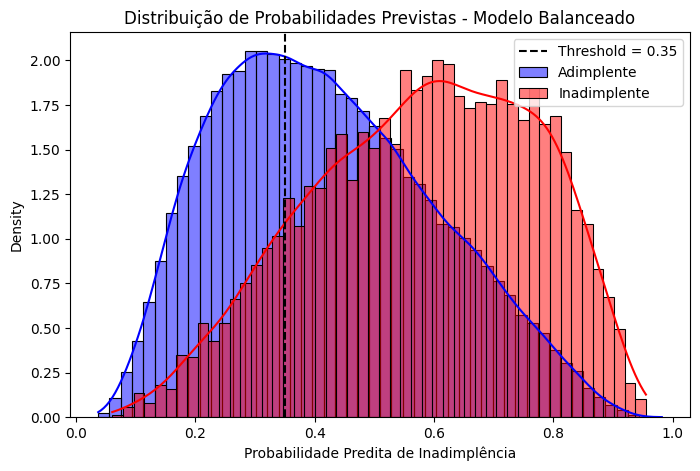

In [64]:
# distribuição das probabilidades 
plt.figure(figsize=(8,5))
sns.histplot(y_prob_test[y_test==0], color='blue', label='Adimplente', kde=True, stat='density', bins=50)
sns.histplot(y_prob_test[y_test==1], color='red', label='Inadimplente', kde=True, stat='density', bins=50)      # inadimplentes
plt.title("Distribuição de Probabilidades Previstas - Modelo Balanceado")
plt.xlabel("Probabilidade Predita de Inadimplência")
plt.axvline(x=0.35, color='black', linestyle='--', label='Threshold = 0.35')        # desenhando o threshold no gráfico
plt.legend()
plt.show()

## Análise das probabilidades

A análise da distribuição das probabilidades mostra uma separação razoável entre clientes adimplentes e inadimplentes.

No entanto, há uma região significativa de sobreposição, o que explica a quantidade elevada de falsos positivos observada no modelo.

## Conclusão

O objetivo deste projeto foi desenvolver um modelo preditivo capaz de identificar clientes com risco de inadimplência. Durante o desenvolvimento, foram avaliadas diferentes estratégias de modelagem, incluindo:

- Modelo baseline de Scikit-learn Logistic Regression

- Ajuste de class_weight="balanced" para lidar com o desbalanceamento

- Otimização do threshold de decisão com base em métricas de negócio

### Resultado Final do Modelo

O modelo final apresentou:

- Recall (inadimplentes): 87%, indica alta capacidade de identificar clientes de risco

- Precision (inadimplentes): 11%, pela presença de falsos positivos, esse foi o principal trade-off do modelo, comportamento esperado em problemas com classes desbalanceadas.

- AUC: ~73%, que indica boa capacidade de separação entre as classes

### Interpretação de Negócio

O modelo foi ajustado para priorizar recall, pois no contexto de crédito:

- é mais crítico não perder um inadimplente real do que classificar erroneamente um bom cliente como risco.

Esse comportamento é coerente com estratégias de:

- prevenção de perda financeira

- concessão de crédito mais conservadora

- priorização de análise manual para clientes suspeitos

## Possíveis evoluções do projeto

- Testar modelos mais complexos (Random Forest, XGBoost)

- Aplicar técnicas de reamostragem (SMOTE)

- Engenharia de variáveis mais avançada

- Ajuste de hiperparâmetros com GridSearchCV

- Análise de explainability (SHAP)

## Valor para o Negócio

Este modelo pode ser aplicado para:

- priorizar análise de crédito

- reduzir inadimplência

- criar políticas de risco

- apoiar decisões automatizadas